## Loading some of the failing tests 

This notebook explores some of the initially failing tests related to [pull request 4335](https://github.com/yt-project/yt/pull/4335). 



In [33]:
test_name = "fake_hexahedral_ds_all_test_1_1_Slice_y_test"
array_name = "_".join(test_name.split("_")[:-3])

First plot the full slice plot images, this is what yt's full image comparison framework compares. 

In [2]:
from IPython.display import Markdown as md

md(f"## main \n ![](./on_main/{test_name}.png)  \n ## new  \n ![](./on_new/{test_name}.png)")

## main 
 ![](./on_main/fake_hexahedral_ds_all_test_1_1_Slice_y_test.png)  
 ## new  
 ![](./on_new/fake_hexahedral_ds_all_test_1_1_Slice_y_test.png)

now load in the underlying fixed resolution buffer values that were saved and plot those to see how they compare:

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import os

In [4]:
im_old = np.load(os.path.join("on_main", array_name+".npy"))
im_new = np.load(os.path.join("on_new", array_name+".npy"))
diff = im_old - im_new
relative_diff = np.abs(diff / im_old)

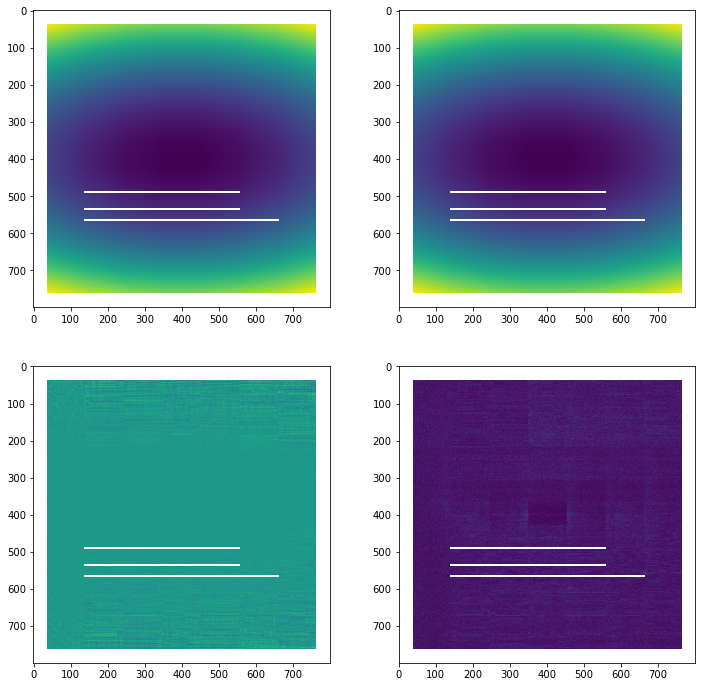

In [5]:
f,axs = plt.subplots(ncols=2,nrows=2,figsize=(12,12))

axs[0][0].imshow(im_old)
axs[0][1].imshow(im_new)
axs[1][0].imshow(diff)
axs[1][1].imshow(relative_diff)

Text(0.5, 1.0, 'max diff: 1.8e-15')

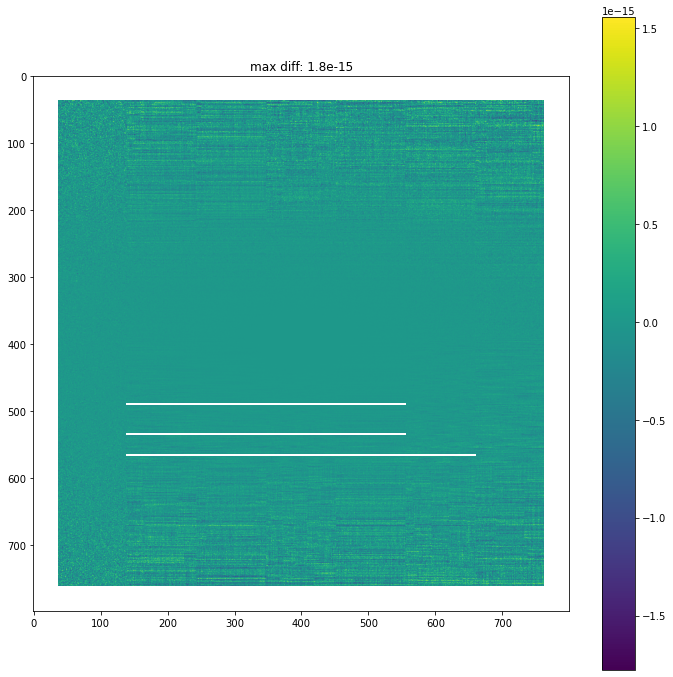

In [6]:
max_diff = np.abs(diff[np.isfinite(diff)]).max()

max_diff_nice = np.round(max_diff, np.abs(int(np.ceil(np.log10(max_diff))-2)))

f = plt.figure(figsize=(12,12))
plt.imshow(diff)
plt.colorbar()
plt.title(f"max diff: {max_diff_nice}")

Text(0.5, 1.0, 'max diff: 4.5e-15')

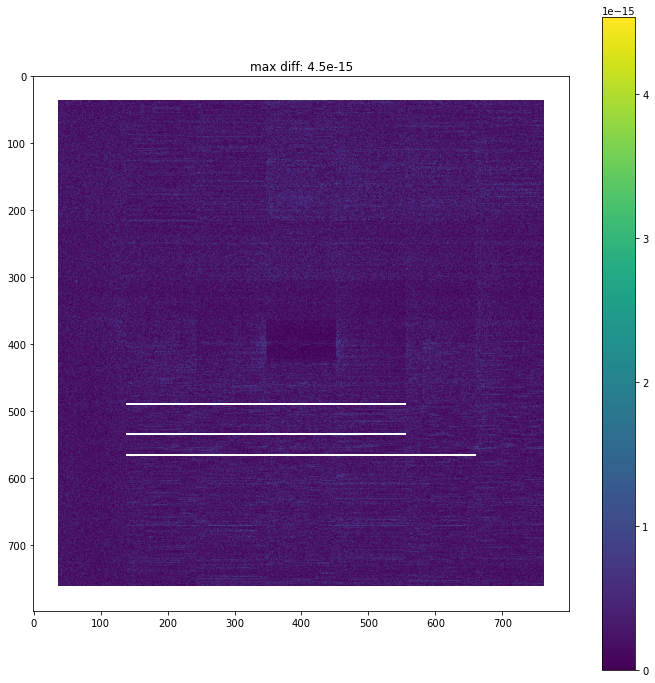

In [70]:
max_diff = np.abs(diff_rms[np.isfinite(diff_rms)]).max()

max_diff_nice = np.round(max_diff, np.abs(int(np.ceil(np.log10(max_diff))-2)))

f = plt.figure(figsize=(12,12))
plt.imshow(diff_rms)
plt.colorbar()
plt.title(f"max relative diff: {max_diff_nice}")

## processing all of the `fake_*.npy` tests:

This section loads the fixed resolution buffer values from all the tests: it loads FRB results run on main and run on the PR branch, calculates differences and saves images of the absolute and relative differences. 

In [17]:
import numpy as np 
import matplotlib.pyplot as plt
import os

outdir="comparison_figs"

files_to_load = []
for fname in os.listdir("on_main"):
    if fname.endswith('.npy') and (fname.startswith('fake_') or fname.startswith('small_fake_')):
        files_to_load.append(fname)
        
       

In [32]:


for fname in files_to_load:
    im_old = np.load(os.path.join("on_main", fname))
    im_new = np.load(os.path.join("on_new", fname))
    diff = im_old - im_new
    diff_relative = np.abs(diff / im_old)

    max_diff = np.abs(diff[np.isfinite(diff)]).max()
    max_relative = np.abs(diff_relative[np.isfinite(diff_relative)]).max()
    if max_diff != 0:
        max_diff_nice = np.round(max_diff, np.abs(int(np.ceil(np.log10(max_diff))-2)))
    else:
        max_diff_nice = max_diff
        
    if max_relative != 0:
        max_relative_nice = np.round(max_relative, np.abs(int(np.ceil(np.log10(max_relative))-2)))
    else:
        max_relative_nice = max_relative


    if max_relative !=0 or max_diff !=0: 
        f, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

        testname = fname.split(".")[0]
        plt.suptitle(testname)
        im = axs[0].imshow(diff, cmap="cubehelix")
        f.colorbar(im, ax=axs[0])
        axs[0].set_title(f"max diff: {max_diff_nice}")

        im = axs[1].imshow(diff_relative, cmap="cubehelix")
        f.colorbar(im, ax=axs[1])
        axs[1].set_title(f"max relative diff: {max_relative_nice}")


        svname = os.path.join(outdir, fname.split(".")[0]+".png")
        f.savefig(svname, facecolor=(1,1,1,1))
        plt.close()


## PhasePlot failures 

how about the PhasePlot failures? These actually aren't even unstructured meshes... 

Using `mesh_tests_profiles.py`, I ran a modified version of the phaseplot tests where I save off the underlying binned values as arrays in addition to saving the full PhasePlot figure. 

The full figures match those saved by yt's answer test suite:


In [35]:
from PIL import Image

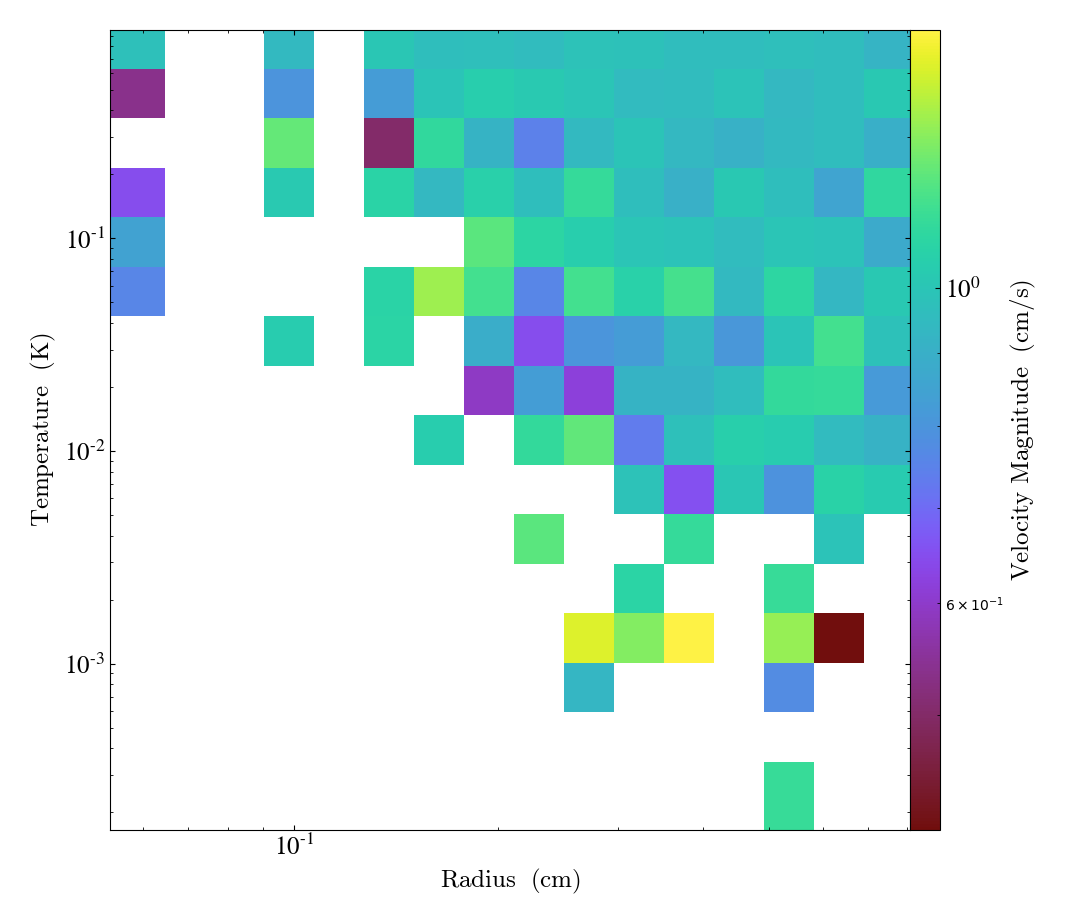

In [36]:
test_name = "PhasePlot_dict_keys([('gas', 'velocity_magnitude')])_17_2d-Profile_radius_temperature_velocity_magnitude"
im_old = Image.open(f"./on_main/{test_name}.png")
im_old

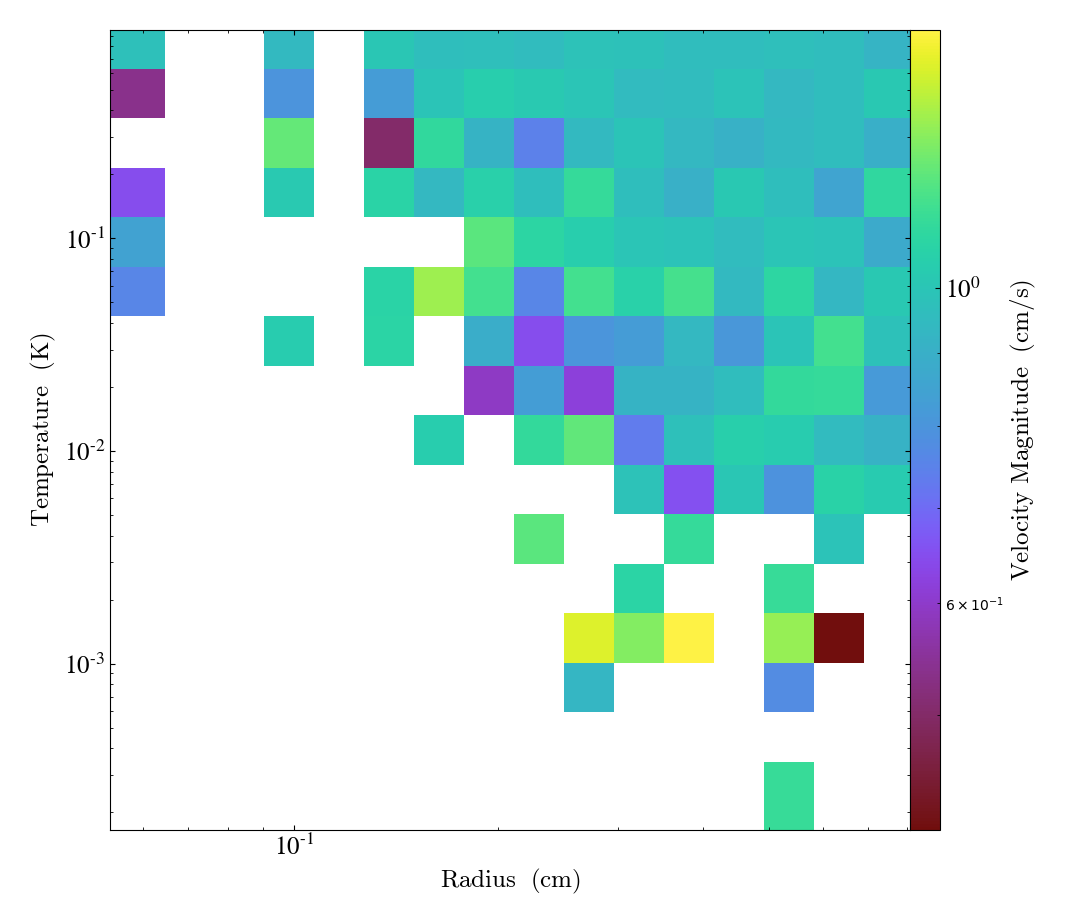

In [37]:
im_new = Image.open(f"./on_new/{test_name}.png")
im_new

and show no difference:

In [38]:
im_old = np.asarray(im_old)[:,:,:3]
im_new = np.asarray(im_new)[:,:,:3]
diff = (im_new-im_old)

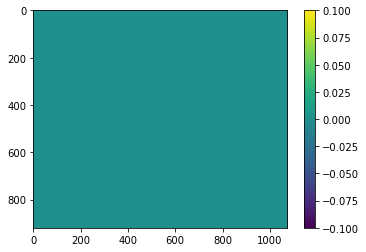

In [39]:
plt.imshow(diff[:,:,2])
plt.colorbar()

In [40]:
diff.max()

0

so not sure why it fails in github CI. 

(Note, I also couldn't get this to fail running nose locally). 

The following loads and compares the underlying binned profile values for each test, showing no difference in the values:

In [68]:
nms = [nm + ".npy" for nm in [
"profile2d_array_fake_random_ds_0_gas_density_gas_temperature_gas_mass",
"profile2d_array_fake_random_ds_0_gas_density_gas_velocity_x_gas_mass",
"profile2d_array_fake_random_ds_0_index_radius_gas_temperature_gas_velocity_magnitude",
"profile2d_array_fake_random_ds_1_gas_density_gas_temperature_gas_mass",
"profile2d_array_fake_random_ds_1_gas_density_gas_velocity_x_gas_mass",
"profile2d_array_fake_random_ds_1_index_radius_gas_temperature_gas_velocity_magnitude",
"profile2d_array_fake_hexahedral_ds_0_connect1_density_connect1_temperature_connect1_mass",
"profile2d_array_fake_hexahedral_ds_0_connect1_density_connect1_velocity_x_connect1_mass",
"profile2d_array_fake_hexahedral_ds_1_connect1_density_connect1_temperature_connect1_mass",
"profile2d_array_fake_hexahedral_ds_1_connect1_density_connect1_velocity_x_connect1_mass",
]]


In [75]:
for nm in nms:
    on_main = np.load("./on_main/"+nm)
    on_new = np.load("./on_new/"+nm)
    diff = on_main - on_new
    diff_rms = np.sqrt( ((on_main - on_new)**2).mean())

    print( (nm, np.abs(diff).mean(), diff_rms, diff.max(), diff.min()))

('profile2d_array_fake_random_ds_0_gas_density_gas_temperature_gas_mass.npy', 0.0, 0.0, 0.0, 0.0)
('profile2d_array_fake_random_ds_0_gas_density_gas_velocity_x_gas_mass.npy', 0.0, 0.0, 0.0, 0.0)
('profile2d_array_fake_random_ds_0_index_radius_gas_temperature_gas_velocity_magnitude.npy', 0.0, 0.0, 0.0, 0.0)
('profile2d_array_fake_random_ds_1_gas_density_gas_temperature_gas_mass.npy', 0.0, 0.0, 0.0, 0.0)
('profile2d_array_fake_random_ds_1_gas_density_gas_velocity_x_gas_mass.npy', 0.0, 0.0, 0.0, 0.0)
('profile2d_array_fake_random_ds_1_index_radius_gas_temperature_gas_velocity_magnitude.npy', 0.0, 0.0, 0.0, 0.0)
('profile2d_array_fake_hexahedral_ds_0_connect1_density_connect1_temperature_connect1_mass.npy', 0.0, 0.0, 0.0, 0.0)
('profile2d_array_fake_hexahedral_ds_0_connect1_density_connect1_velocity_x_connect1_mass.npy', 0.0, 0.0, 0.0, 0.0)
('profile2d_array_fake_hexahedral_ds_1_connect1_density_connect1_temperature_connect1_mass.npy', 0.0, 0.0, 0.0, 0.0)
('profile2d_array_fake_hexahedral_